In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 19:39:11.763990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone14Pro_I(iv) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14Pro_I(iv)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.0078125j 0.0234375+0.j        0.015625 +0.015625j  ...
 0.0234375+0.0078125j 0.       +0.j        0.0234375+0.0078125j]
2048
77828
(2048, 77828)
[0.01934693 0.00994371 0.00324411 ... 0.00216142 0.00433003 0.00997052]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.0078125+0.j        0.0078125-0.0078125j ...
 0.015625 +0.015625j  0.0078125+0.j        0.0234375+0.j       ]
2048
83312
(2048, 83312)
[0.01869232 0.00979125 0.00402684 ... 0.00165137 0.00374471 0.00973141]
1
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.03125  +0.015625j  0.0078125-0.0078125j ...
 0.015625 +0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j]
2048
71024
(2048, 71024)
[0.0186828  0.00980125 0.00405719 ... 0.00174633 0.00372244 0.00980975]
2
(30000, 2048)
(30000,)
[0.03125  +0.015625j  0.015625 +0.0078125j 0.03125  -0.0078125j ...
 0.015625 +0.0078125j 0.0234375+0.j        0.015625 -0.015625j ]
2048
85653
(2048, 85653)
[0.0187249  0.00987723 0.00351864 ... 0.00193076 0.00375279 0.00974119]
3
(40

## Cross-model Validation

## iPhone14Pro_I(i) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(i)_model.h5")
model.summary()

2023-02-27 20:02:21.269009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 6.1742 - accuracy: 0.1013
test loss, test acc: [6.174211025238037, 0.10131999850273132]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 11s 4ms/step
[[ 666 1563 1452  186   16    2  920  713 2571 1911]
 [ 363 1928 1185  168   10    4 1062  870 1836 2574]
 [ 279 2154 1242  178    4    1 1268 1189 1353 2332]
 [1406 1079 1868 1236   13    1  486 2467  470  974]
 [ 230 2039  923  203    7    3 1873  900 1794 2028]
 [ 927 1144 1853  438   17    2 1042 1360 1629 1588]
 [ 304 1663 1041  117   16    3 1334  571 2551 2400]
 [ 529 1856 1373  196   17    0 1236  812 2123 1858]
 [2640  475 2226  866    5    0  238 2412  444  694]
 [ 282 1565 1108  263    6    3 1787  991 1534 2461]]
              precision    recall  f1-score   support

           0       0.09      0.07      0.08     10000
           1       0.12      0.19      0.15     10000
           2       0.09      0.12      0.10     10000
           3       0.32      0.12      0.18     10000
           4       0.06      0.00      0.00     10000
           5       0.11      0.00      0.00     10000
           6       0.12      0.1

Test Accuracy:0.10132


Text(0.5, 1.0, 'Accuracy:0.101')

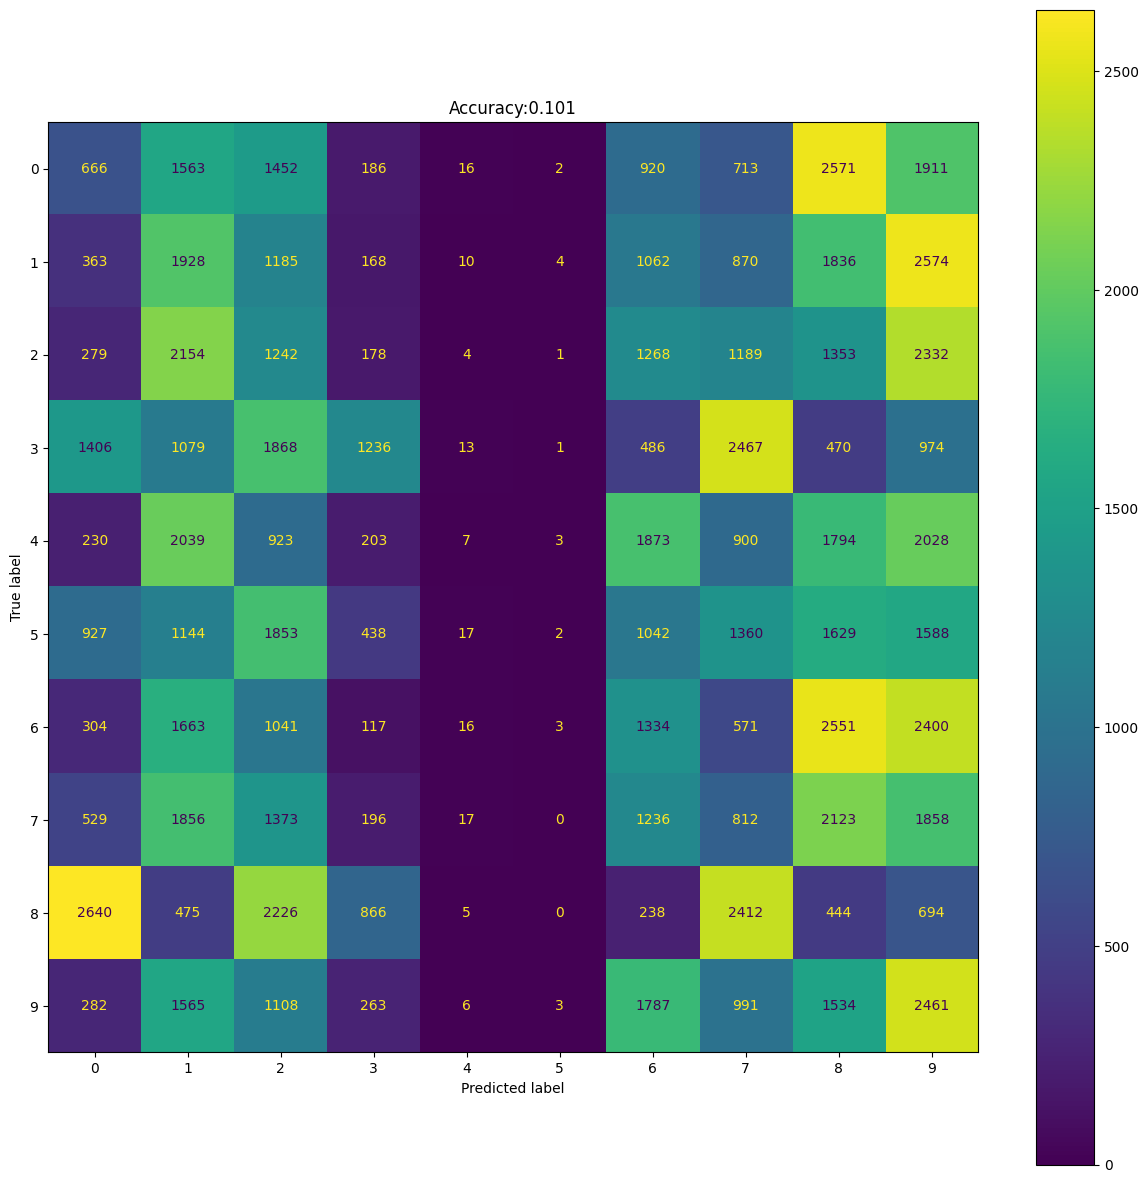

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 3.6466 - accuracy: 0.1348
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3184 - accuracy: 0.1903
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1205 - accuracy: 0.2109
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.0852 - accuracy: 0.2176
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0741 - accuracy: 0.2212
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0692 - accuracy: 0.2233
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0660 - accuracy: 0.2258
Epoch 8/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.0639 - accuracy: 0.2261
Epoch 9/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.0619 - accuracy: 0.2271
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

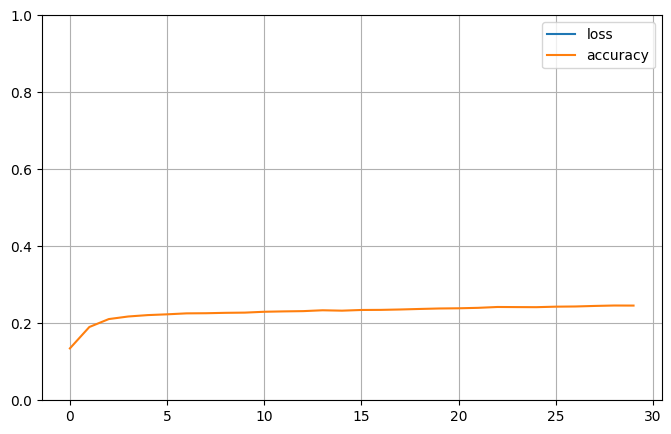

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 2.0318 - accuracy: 0.2499
test loss, test acc: [2.031756639480591, 0.2498600035905838]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[2805  570 1060  993  959  589 1248  299  704  773]
 [1547 1115 1623 1070 1184  414 1341  200  445 1061]
 [1302  730 2590 1253 1198  386  992  164  374 1011]
 [ 727  255  652 4246  353  413  139  118 2609  488]
 [1240  556 1243  966 2353  503 1317  275  251 1296]
 [1417  465  790 1776  840 1306  737  288 1434  947]
 [1672  647 1038  627 1290  466 2521  323  302 1114]
 [1825  550 1038 1108 1307  605 1474  591  539  963]
 [ 638  154  297 2598  120  512   80   80 5284  237]
 [1155  541 1190 1175 1474  536 1146  237  371 2175]]
              precision    recall  f1-score   support

           0       0.20      0.28      0.23     10000
           1       0.20      0.11      0.14     10000
           2       0.22      0.26      0.24     10000
           3       0.27      0.42      0.33     10000
           4       0.21      0.24      0.22     10000
           5       0.23      0.13      0.17     10000
           6       0.23      0.2

Test Accuracy:0.24986


Text(0.5, 1.0, 'Accuracy:0.250')

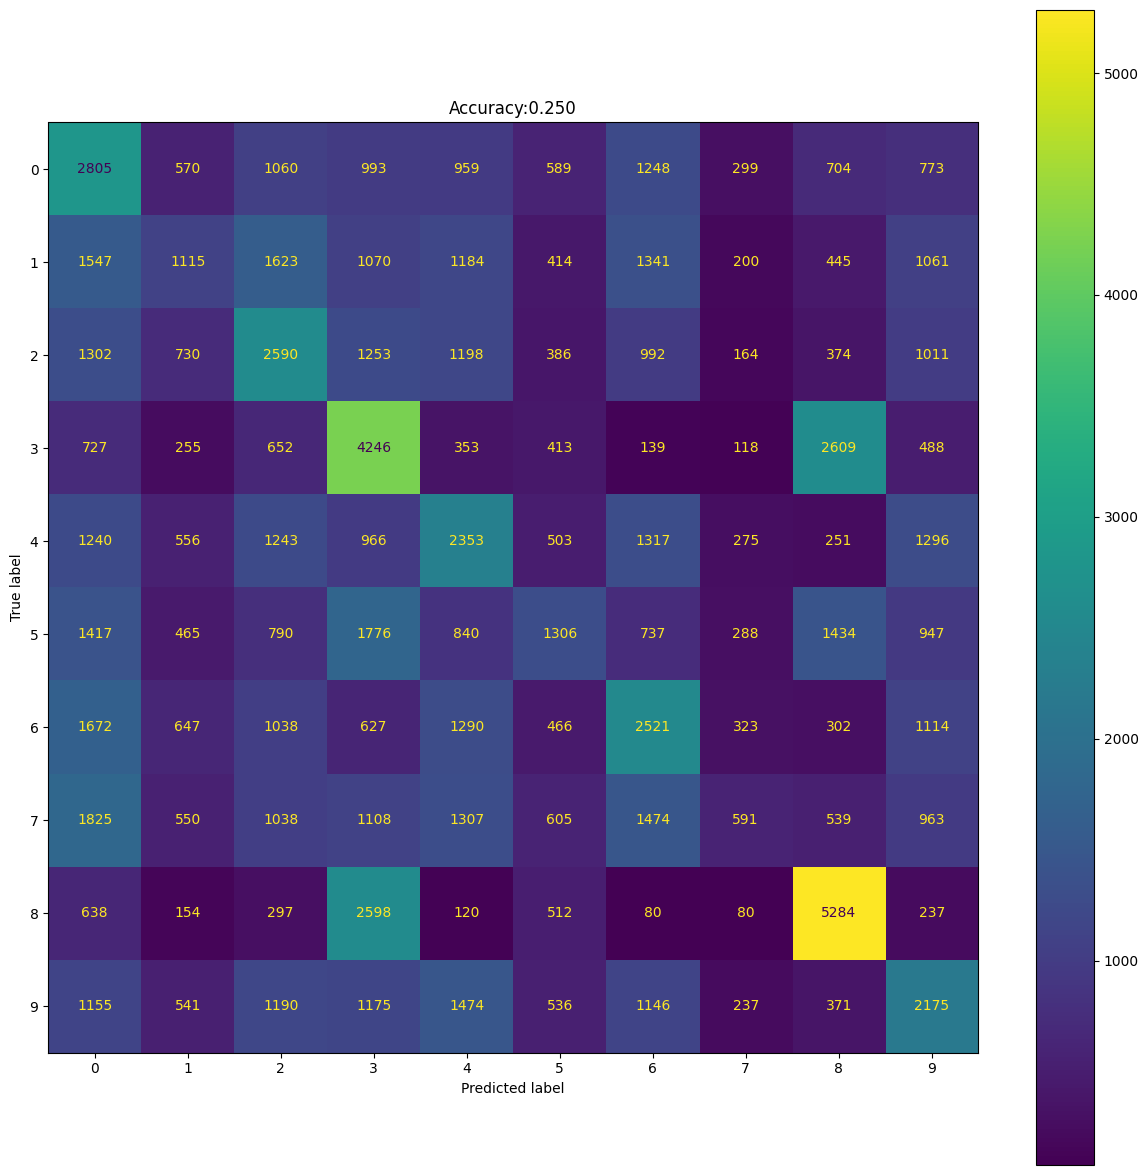

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 6.3775 - accuracy: 0.1049
test loss, test acc: [6.377463340759277, 0.10486000031232834]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[ 209  699 2491    0 2002 1088 2985  116  373   37]
 [ 158 1071 2204    0 1417 2064 2374   83  595   34]
 [ 338 1600 1651    2 1247 1367 2162  227 1357   49]
 [1143 3090 1168    0  680  359 1139  779 1625   17]
 [ 229 1064 1947    1 2156 1672 1874   91  910   56]
 [ 807 1882 1441    0 1265  663 2042  557 1311   32]
 [ 344  831 1895    0 1984 1519 2540  113  711   63]
 [ 271  980 2706    0 2108 1185 1872  137  716   25]
 [1819 2260  786    1  680  139  741 1530 2026   18]
 [ 377 1308 2142    0 1771 1186 2172  145  866   33]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.03     10000
           1       0.07      0.11      0.09     10000
           2       0.09      0.17      0.12     10000
           3       0.00      0.00      0.00     10000
           4       0.14      0.22      0.17     10000
           5       0.06      0.07      0.06     10000
           6       0.13      0.2

Test Accuracy:0.10486


Text(0.5, 1.0, 'Accuracy:0.105')

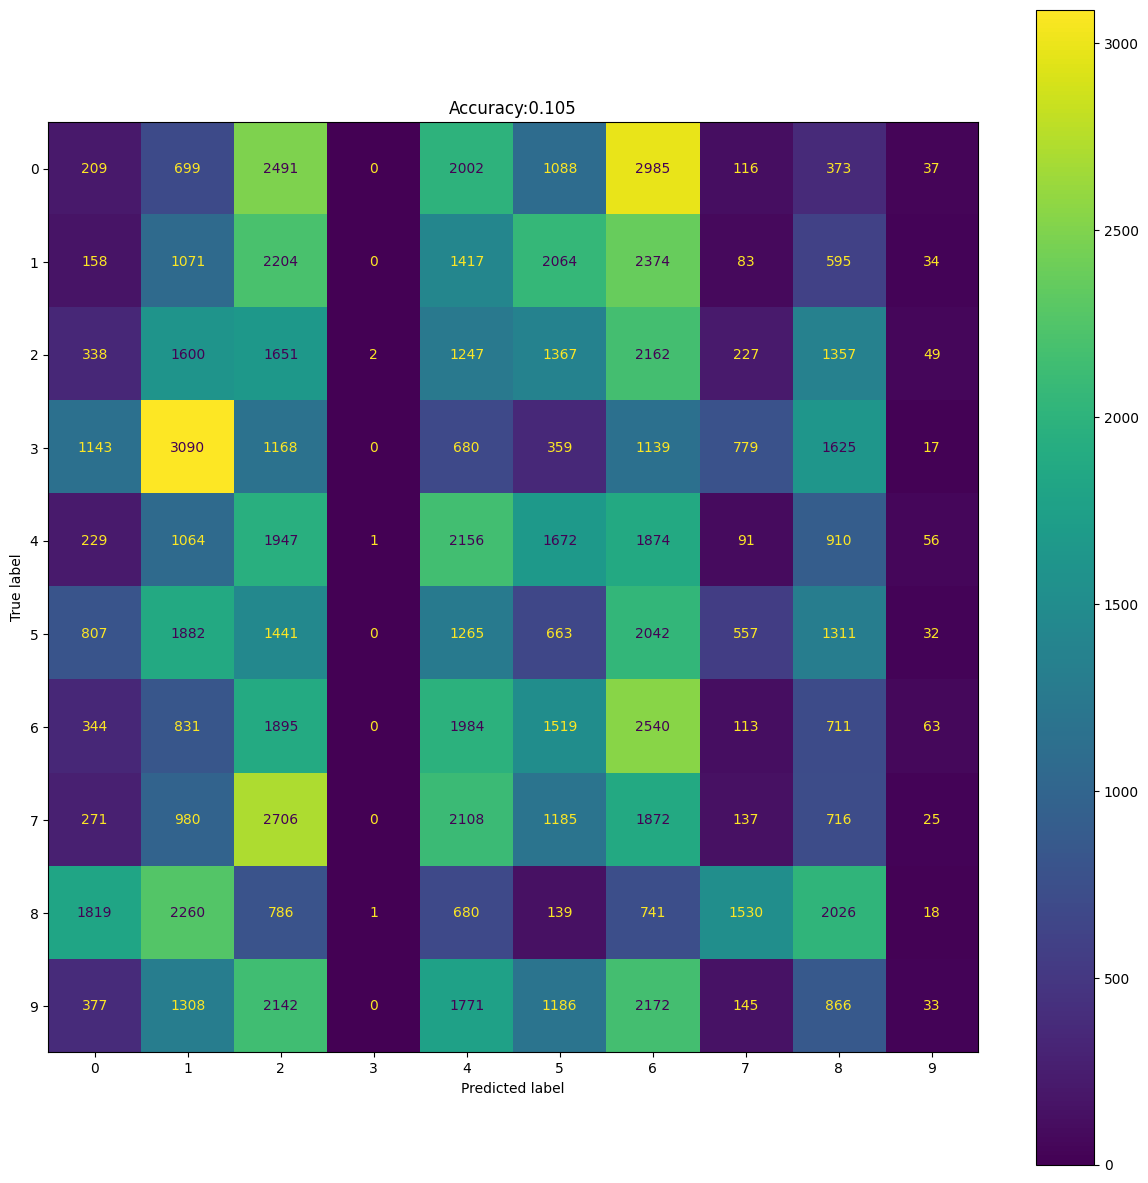

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 3.6685 - accuracy: 0.1250
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3758 - accuracy: 0.1723
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.1732 - accuracy: 0.1955
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1182 - accuracy: 0.2057
Epoch 5/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.0944 - accuracy: 0.2144
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0815 - accuracy: 0.2203
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0738 - accuracy: 0.2225
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.0679 - accuracy: 0.2255
Epoch 9/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.0636 - accuracy: 0.2286
Epoch 10/30
3125/3125 [==============================] - 11s 4ms/step - l

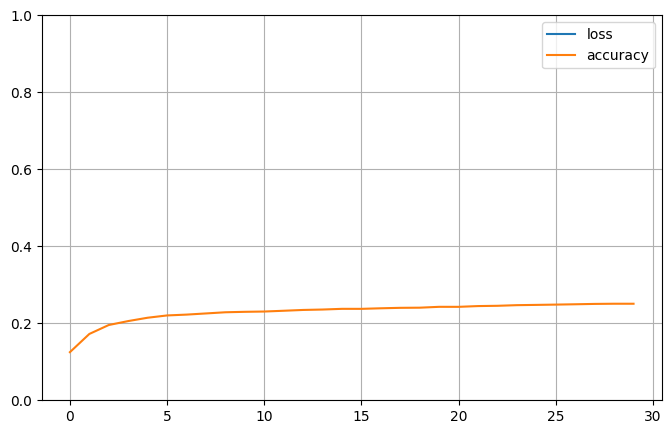

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 2.0248 - accuracy: 0.2521
test loss, test acc: [2.024817943572998, 0.2521499991416931]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 11s 4ms/step
[[3673  918 1269  235 1015  982  745  388  376  399]
 [1686 2163 2079  366 1101  768  715  316  245  561]
 [1021  842 3232  648  903 1216  635  254  874  375]
 [ 378  188 1326 2366  232 1526  212  161 3344  267]
 [1638 1038 1865  376 2114 1050  711  403  372  433]
 [ 977  379 1678  962  499 2441  475  257 1948  384]
 [1954 1049 1833  331 1045 1122 1351  390  489  436]
 [2165  885 1501  416 1232 1079  759  820  594  549]
 [ 252   34  649 1188  116 1269  131  111 6126  124]
 [1636  988 1778  567  994 1348  770  398  592  929]]
              precision    recall  f1-score   support

           0       0.24      0.37      0.29     10000
           1       0.25      0.22      0.23     10000
           2       0.19      0.32      0.24     10000
           3       0.32      0.24      0.27     10000
           4       0.23      0.21      0.22     10000
           5       0.19      0.24      0.21     10000
           6       0.21      0.1

Test Accuracy:0.25215


Text(0.5, 1.0, 'Accuracy:0.252')

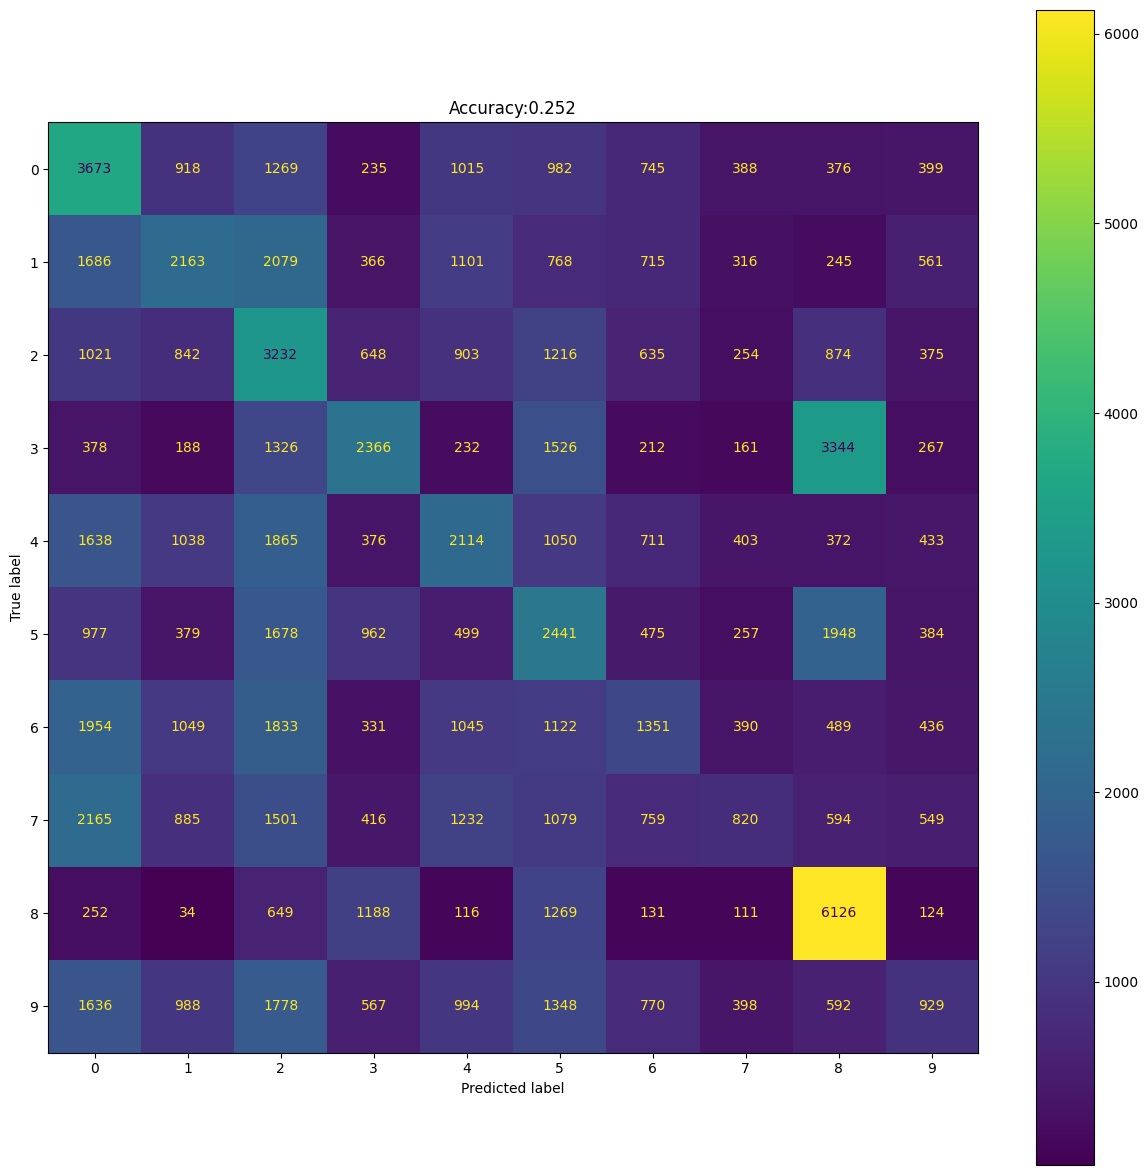

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iii) model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 5.2786 - accuracy: 0.1027
test loss, test acc: [5.278570175170898, 0.1026500016450882]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[ 742 2155 1322  911  643  933  687  551 1253  803]
 [1032  978 1237 1303  776  827 1307  596  904 1040]
 [ 876 1123 1084 1331  957  980 1216  961  443 1029]
 [ 896 1422  968 1458  737 1435  552  955 1014  563]
 [1235  987  646 1178 1202  774 1090 1166  831  891]
 [ 815 1698 1654 1317  627  890  590  731  878  800]
 [ 885 1164  745  999  877  995 1380 1029  727 1199]
 [ 826 1909 1220  809  536  915  792  687 1245 1061]
 [ 604 1836 1436 1168  625 1304  741  602  986  698]
 [1003 1437 1027 1224  852  805  918 1024  852  858]]
              precision    recall  f1-score   support

           0       0.08      0.07      0.08     10000
           1       0.07      0.10      0.08     10000
           2       0.10      0.11      0.10     10000
           3       0.12      0.15      0.13     10000
           4       0.15      0.12      0.13     10000
           5       0.09      0.09      0.09     10000
           6       0.15      0.1

Test Accuracy:0.10265


Text(0.5, 1.0, 'Accuracy:0.103')

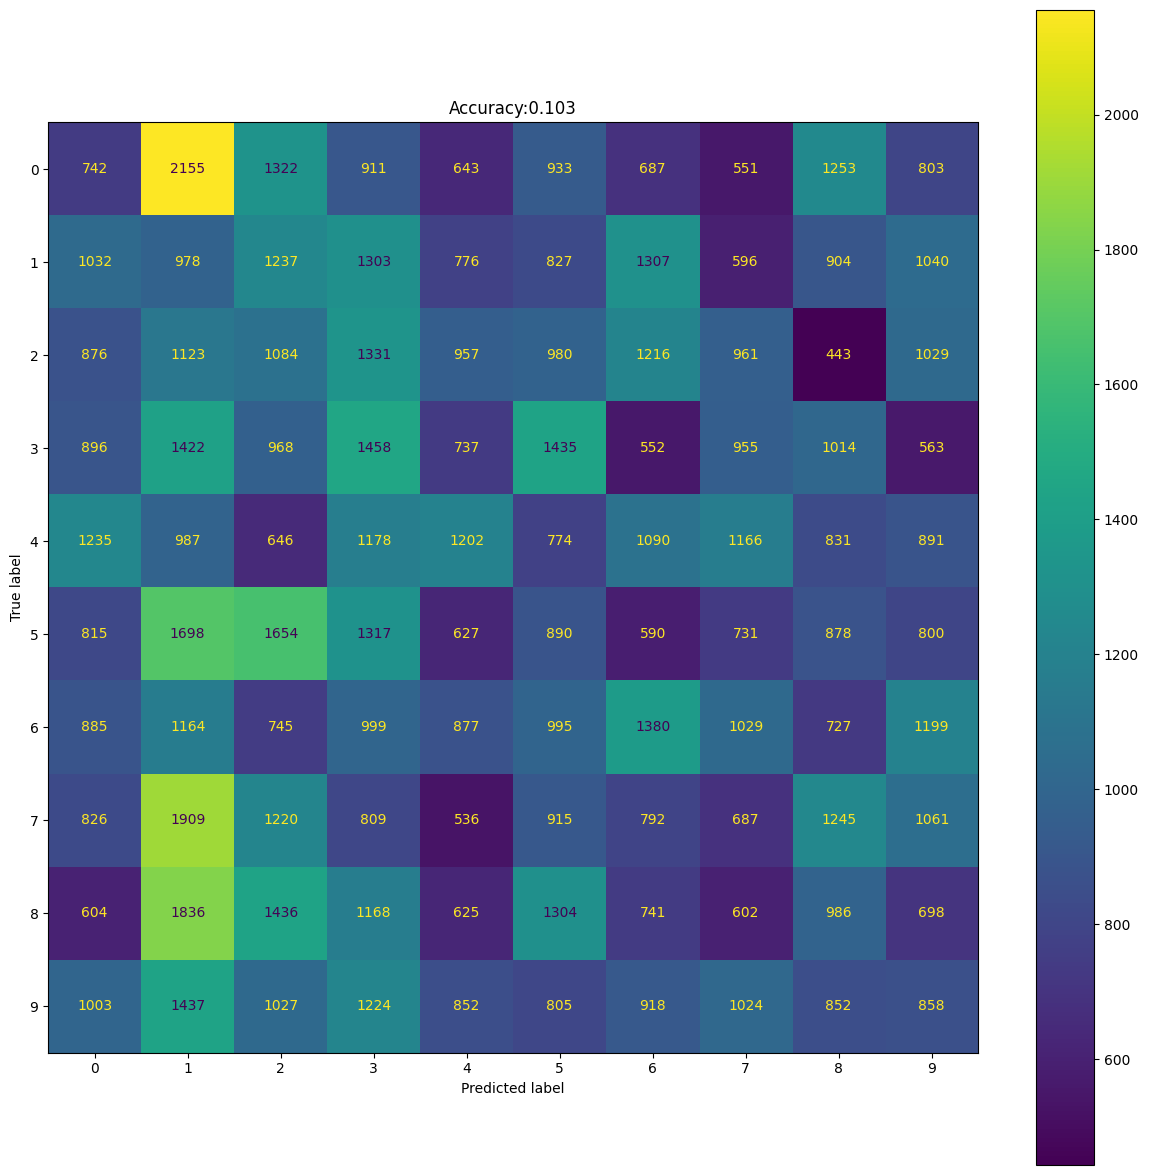

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1720 - accuracy: 0.2077
Epoch 2/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.1706 - accuracy: 0.2078
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1693 - accuracy: 0.2094
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1684 - accuracy: 0.2097
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1670 - accuracy: 0.2102
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1660 - accuracy: 0.2115
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1645 - accuracy: 0.2113
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1636 - accuracy: 0.2128
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.1623 - accuracy: 0.2127
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

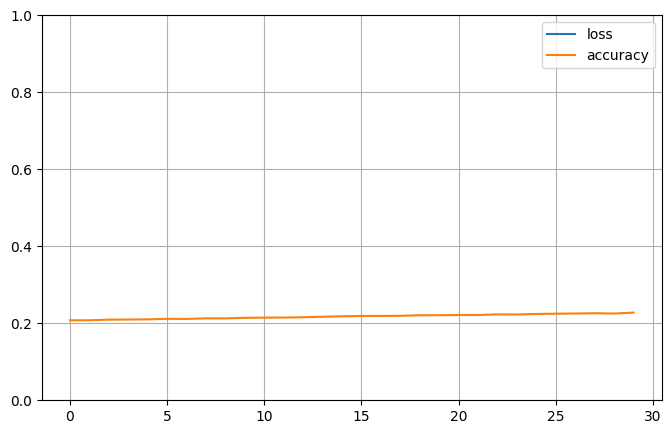

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 2.1392 - accuracy: 0.2272
test loss, test acc: [2.139181137084961, 0.22721000015735626]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 11s 4ms/step
[[2269  979  773 1352  823  661 1000  824 1174  145]
 [ 773 2638 1138 1098 1042  571 1267  597  765  111]
 [ 626 1142 2741 1384 1164  483 1145  488  716  111]
 [ 772  748  980 3411 1015  664  807  545  955  103]
 [ 709  992 1176 1329 3055  325 1375  487  402  150]
 [1059 1214  986 1700  751 1495  821  783 1059  132]
 [ 743 1201 1153 1123 1397  417 2556  698  594  118]
 [1142 1081  821 1194  811  680 1220 1978  923  150]
 [1148 1031  924 1692  689  703  918  690 2065  140]
 [1030 1156 1169 1504 1435  550 1196  706  741  513]]
              precision    recall  f1-score   support

           0       0.22      0.23      0.22     10000
           1       0.22      0.26      0.24     10000
           2       0.23      0.27      0.25     10000
           3       0.22      0.34      0.26     10000
           4       0.25      0.31      0.28     10000
           5       0.23      0.15      0.18     10000
           6       0.21      0.2

Test Accuracy:0.22721


Text(0.5, 1.0, 'Accuracy:0.227')

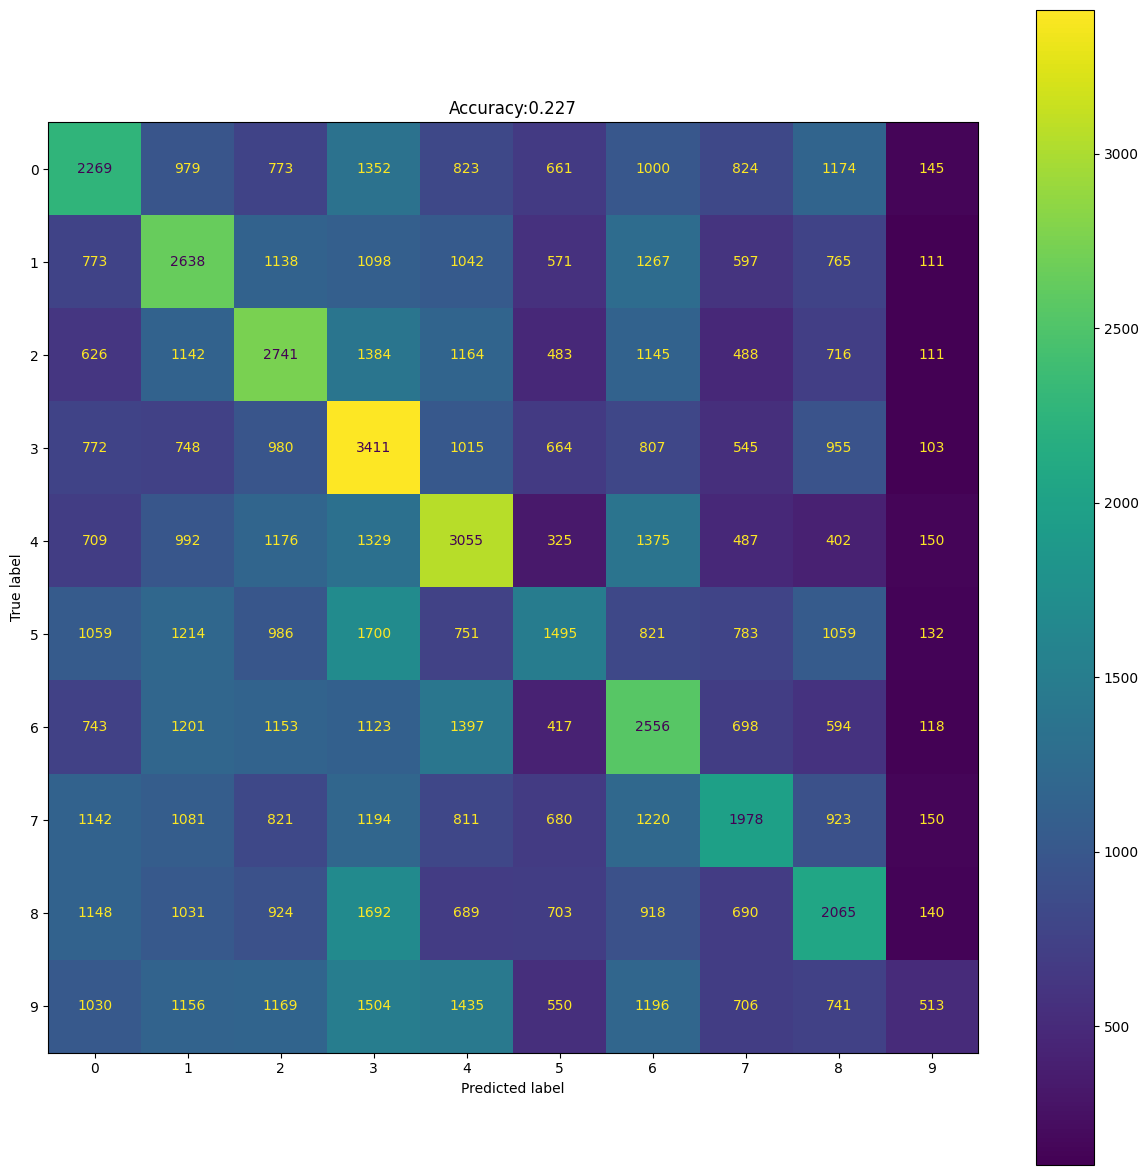

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(v) model

Cross-model Validation without training

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 18.6206 - accuracy: 0.1000
test loss, test acc: [18.620637893676758, 0.10000000149011612]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[  19    0    0    0    0    0   10 9971    0    0]
 [   7    0    0    0    0    0   12 9981    0    0]
 [   8    0    0    0    0    0    5 9987    0    0]
 [  10    0    0    0    0    0    2 9988    0    0]
 [  13    0    0    0    0    0    4 9983    0    0]
 [  15    0    0    0    0    0    8 9977    0    0]
 [  25    0    0    0    0    0   10 9965    0    0]
 [  24    0    0    0    0    0    5 9971    0    0]
 [   7    0    0    0    0    0    2 9991    0    0]
 [  20    0    0    0    0    0    5 9975    0    0]]
              precision    recall  f1-score   support

           0       0.13      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.16      0.0

Test Accuracy:0.1


Text(0.5, 1.0, 'Accuracy:0.100')

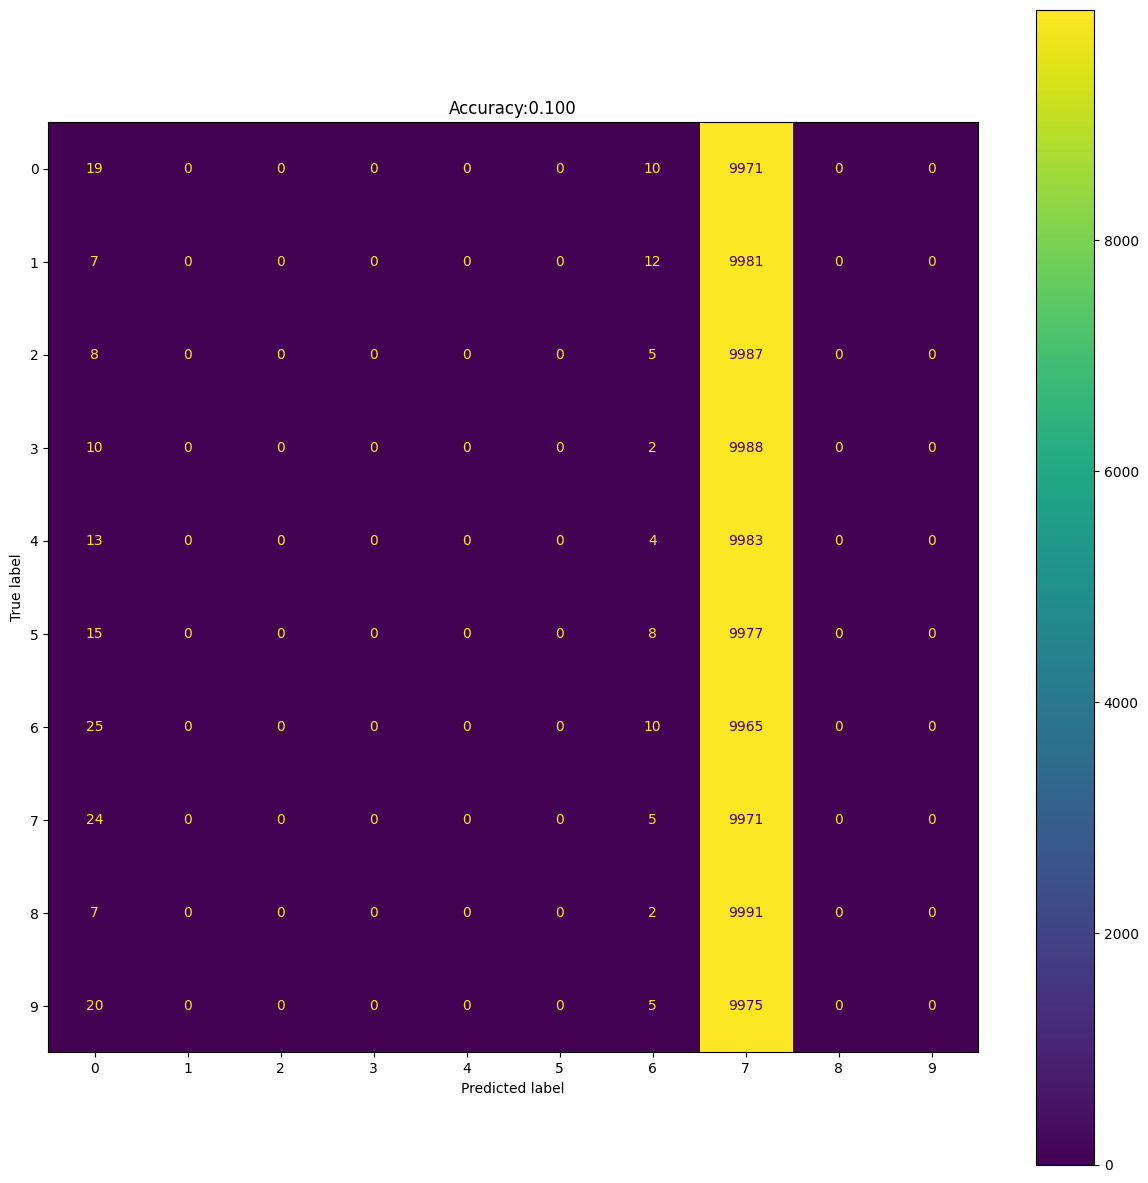

In [38]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [39]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [40]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 3.0797 - accuracy: 0.0988
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.4806 - accuracy: 0.1049
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3700 - accuracy: 0.1118
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3345 - accuracy: 0.1170
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3161 - accuracy: 0.1213
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.3046 - accuracy: 0.1247
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2969 - accuracy: 0.1302
Epoch 8/30
3125/3125 [==============================] - 11s 4ms/step - loss: 2.2919 - accuracy: 0.1316
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2881 - accuracy: 0.1322
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

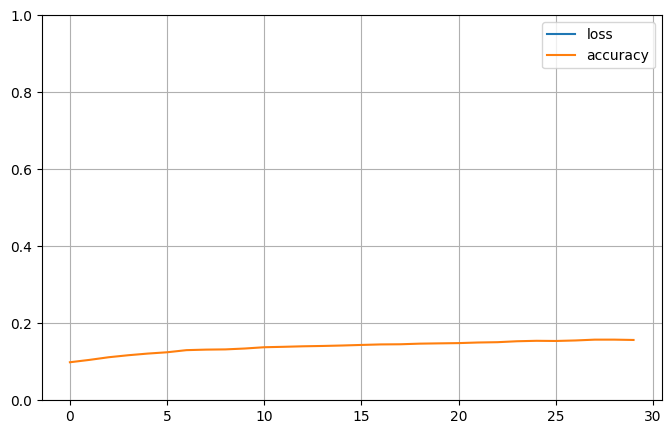

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 2.2528 - accuracy: 0.1642
test loss, test acc: [2.2527599334716797, 0.1642100065946579]


In [43]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 11s 4ms/step
[[  31  443   12  296 1502  912 1031 1761 2593 1419]
 [  14  777   28  242 1534  761  816 1775 2775 1278]
 [  10  446   49  256 1614  754  796 1779 2832 1464]
 [  19  312   17  615 1685  733  779 1258 3420 1162]
 [  13  478   16  336 2672  739  809 1364 2579  994]
 [  10  407   14  281 1288 1225 1002 1550 2635 1588]
 [  20  389   23  270 1278  823 1824 1431 2256 1686]
 [  17  483   12  314 1526  855  715 2226 2635 1217]
 [  12  392    7  299 1296  612  696 1043 4587 1056]
 [  11  349   18  202 1232  832 1068 1488 2385 2415]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.01     10000
           1       0.17      0.08      0.11     10000
           2       0.25      0.00      0.01     10000
           3       0.20      0.06      0.09     10000
           4       0.17      0.27      0.21     10000
           5       0.15      0.12      0.13     10000
           6       0.19      0.1

Test Accuracy:0.16421


Text(0.5, 1.0, 'Accuracy:0.164')

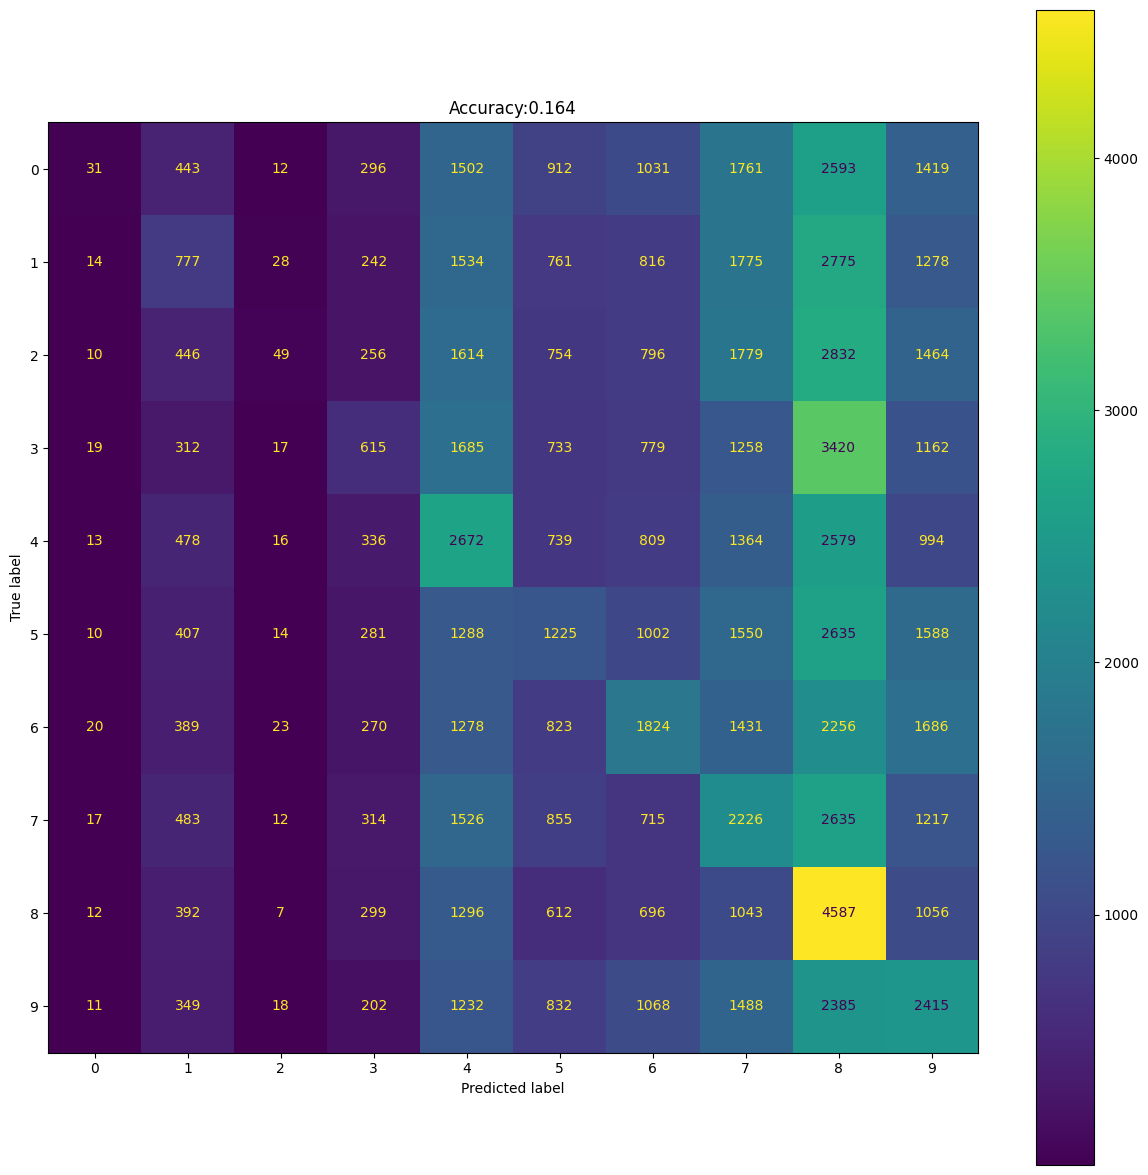

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')